## Understanding Property Maintenance Fines from MDST Blight Data

This assignment is based on a data challenge from the Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)).That was also a part of Applied Data Science with Python Specialization offered by the ([University of Michigan](https://www.umich.edu/)) via ([Coursera](https://www.coursera.org/learn/python-machine-learning/home/welcome)). 

The Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)) and the Michigan Student Symposium for Interdisciplinary Statistical Sciences ([MSSISS](https://sites.lsa.umich.edu/mssiss/)) have partnered with the City of Detroit to help solve one of the most pressing problems facing Detroit - blight. [Blight violations](http://www.detroitmi.gov/How-Do-I/Report/Blight-Complaint-FAQs) are issued by the city to individuals who allow their properties to remain in a deteriorated condition. Every year, the city of Detroit issues millions of dollars in fines to residents and every year, many of these fines remain unpaid. Enforcing unpaid blight fines is a costly and tedious process, so the city wants to know: how can we increase blight ticket compliance?

All data for this assignment has been provided through the [Detroit Open Data Portal](https://data.detroitmi.gov/).
___

<br>

**File descriptions**

    train.csv - the training set (all tickets issued 2004-2011)
    test.csv - the test set (all tickets issued 2012-2016)
    addresses.csv & latlons.csv - mapping from ticket id to addresses, and from addresses to lat/lon coordinates. 
     Note: misspelled addresses may be incorrectly geolocated.

<br>

**Data fields**

train.csv & test.csv

    ticket_id - unique identifier for tickets
    agency_name - Agency that issued the ticket
    inspector_name - Name of inspector that issued the ticket
    violator_name - Name of the person/organization that the ticket was issued to
    violation_street_number, violation_street_name, violation_zip_code - Address where the violation occurred
    mailing_address_str_number, mailing_address_str_name, city, state, zip_code, non_us_str_code, country - Mailing address of the violator
    ticket_issued_date - Date and time the ticket was issued
    hearing_date - Date and time the violator's hearing was scheduled
    violation_code, violation_description - Type of violation
    disposition - Judgment and judgement type
    fine_amount - Violation fine amount, excluding fees
    admin_fee - $20 fee assigned to responsible judgments
state_fee - $10 fee assigned to responsible judgments
    late_fee - 10% fee assigned to responsible judgments
    discount_amount - discount applied, if any
    clean_up_cost - DPW clean-up or graffiti removal cost
    judgment_amount - Sum of all fines and fees
    grafitti_status - Flag for graffiti violations
    
train.csv only

    payment_amount - Amount paid, if any
    payment_date - Date payment was made, if it was received
    payment_status - Current payment status as of Feb 1 2017
    balance_due - Fines and fees still owed
    collection_status - Flag for payments in collections
    compliance [target variable for prediction] 
     Null = Not responsible
     0 = Responsible, non-compliant
     1 = Responsible, compliant
    compliance_detail - More information on why each ticket was marked compliant or non-compliant


___

## Visualization

This part of the project **only deals with Exploratory Data Analysis**. The predictive modeling part will be dealt with seperately. For now, I'll look at the data and try to understand it.

Also, I'm not looking into the geolocational data right now. Though it would be a strong feature in predictive modeling. But as far as thing part of the assignment is concerned, I'm only looking at the training data. 

___

## Loading Data sets

Let's load the datasets and take a peek at the data given

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# Loading Datasets
address = pd.read_csv('addresses.csv')
train = pd.read_csv('train.csv', encoding = 'ISO-8859-1', low_memory = False)
latlon = pd.read_csv('latlons.csv')
display(train.head(5))
display(latlon.head(5))
display(address.head(5))

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


,address,lat,lon
0,"4300 rosa parks blvd, Detroit MI 48208",42.346169,-83.079962
1,"14512 sussex, Detroit MI",42.394657,-83.194265
2,"3456 garland, Detroit MI",42.373779,-82.986228
3,"5787 wayburn, Detroit MI",42.403342,-82.957805
4,"5766 haverhill, Detroit MI",42.407255,-82.946295


,ticket_id,address
0,22056,"2900 tyler, Detroit MI"
1,27586,"4311 central, Detroit MI"
2,22062,"1449 longfellow, Detroit MI"
3,22084,"1441 longfellow, Detroit MI"
4,22093,"2449 churchill, Detroit MI"


It's no use keeping these datasets seperate. Merging them into a single dataset would make the analysis a lot easier

In [3]:
# Merging address and latlon datasets
address_merged = pd.merge(address,latlon, how = 'inner',on = 'address')

# Merging train with address_merged 
train_merged = pd.merge(train,address_merged,how = 'inner', on = 'ticket_id')
display(train_merged.head(5))

# Deleting the previous datasets to save memory
del address,train,latlon

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance,address,lat,lon
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0,"2900 tyler, Detroit MI",42.390729,-83.124268
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0,"4311 central, Detroit MI",42.326937,-83.135118
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN,"1449 longfellow, Detroit MI",42.380516,-83.096069
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,...,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN,"1441 longfellow, Detroit MI",42.380570,-83.095919
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,...,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN,"2449 churchill, Detroit MI",42.145257,-83.208233


The compliance table has three variables as described in the file description. But since we are looking into binary classification of compliance and non-compliance, we can ignore the null values (i.e. not responsible). And then let's look at the data overall.

In [4]:
train_merged = train_merged[pd.notnull(train_merged.compliance)]

# Overall
train_merged.info()
train_merged.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159880 entries, 0 to 250293
Data columns (total 37 columns):
ticket_id                     159880 non-null int64
agency_name                   159880 non-null object
inspector_name                159880 non-null object
violator_name                 159854 non-null object
violation_street_number       159880 non-null float64
violation_street_name         159880 non-null object
violation_zip_code            0 non-null float64
mailing_address_str_number    157322 non-null float64
mailing_address_str_name      159877 non-null object
city                          159880 non-null object
state                         159796 non-null object
zip_code                      159879 non-null object
non_us_str_code               3 non-null object
country                       159880 non-null object
ticket_issued_date            159880 non-null object
hearing_date                  159653 non-null object
violation_code                159880 non-null obj

,ticket_id,violation_street_number,violation_zip_code,mailing_address_str_number,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,payment_amount,balance_due,compliance,lat,lon
count,159880.000000,1.598800e+05,0.0,1.573220e+05,159880.000000,159880.0,159880.0,159880.000000,159880.000000,159880.0,159880.000000,159880.000000,159880.000000,159880.000000,159878.000000,159878.000000
mean,150453.858794,1.071316e+04,NaN,9.133714e+03,357.035295,20.0,10.0,33.651512,0.195959,0.0,420.650218,72.206537,348.263284,0.072536,42.389747,-83.111530
std,77224.650876,3.623159e+04,NaN,3.657729e+04,675.655580,0.0,0.0,67.692916,4.290344,0.0,742.555062,259.849545,729.295700,0.259374,0.037120,0.093515
min,18645.000000,0.000000e+00,NaN,1.000000e+00,0.000000,20.0,10.0,0.000000,0.000000,0.0,0.000000,0.000000,-7750.000000,0.000000,42.145257,-84.403766
25%,83370.750000,4.920000e+03,NaN,5.320000e+02,200.000000,20.0,10.0,10.000000,0.000000,0.0,250.000000,0.000000,85.000000,0.000000,42.364536,-83.185854
50%,149777.500000,1.039800e+04,NaN,2.418000e+03,250.000000,20.0,10.0,25.000000,0.000000,0.0,305.000000,0.000000,305.000000,0.000000,42.392575,-83.124521
75%,217480.250000,1.578325e+04,NaN,1.284400e+04,250.000000,20.0,10.0,25.000000,0.000000,0.0,305.000000,0.000000,305.000000,0.000000,42.419160,-83.033202
max,299363.000000,1.415411e+07,NaN,5.111345e+06,10000.000000,20.0,10.0,1000.000000,350.000000,0.0,11030.000000,11030.000000,11030.000000,1.000000,44.785389,-82.512936


Since violation_zip_code,grafitti_status and non_us_str_code are almost empty.  
Let's ignore those variables too. Now let's look at the num.  
## Single Variable Visualization

### Numerical Variables

<IPython.core.display.Javascript object>


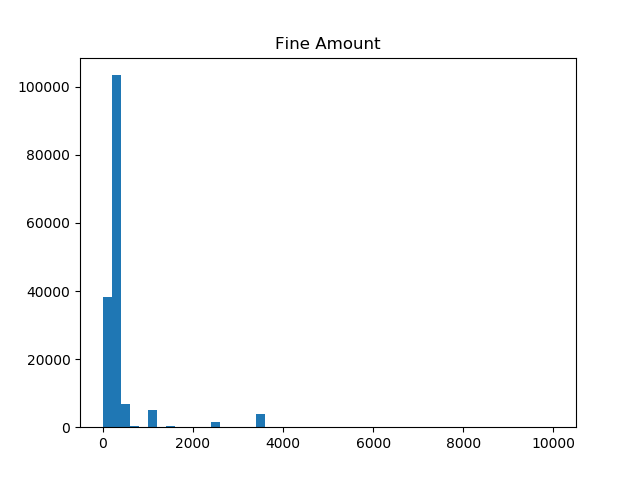

<IPython.core.display.Javascript object>


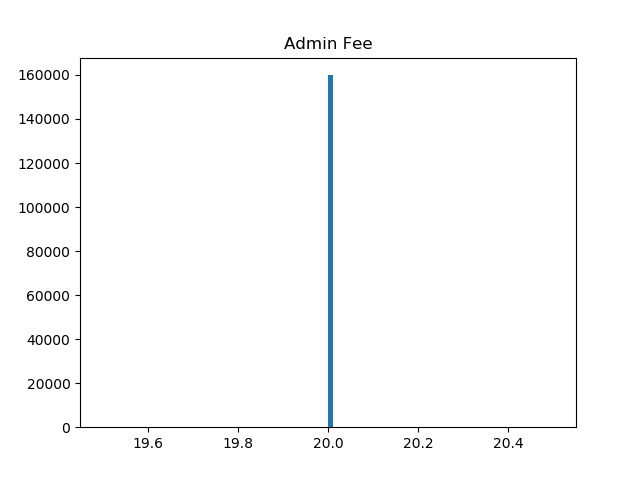

<IPython.core.display.Javascript object>


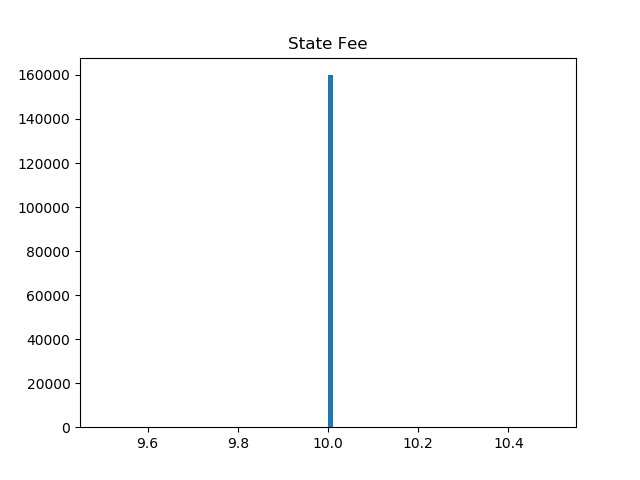

<IPython.core.display.Javascript object>


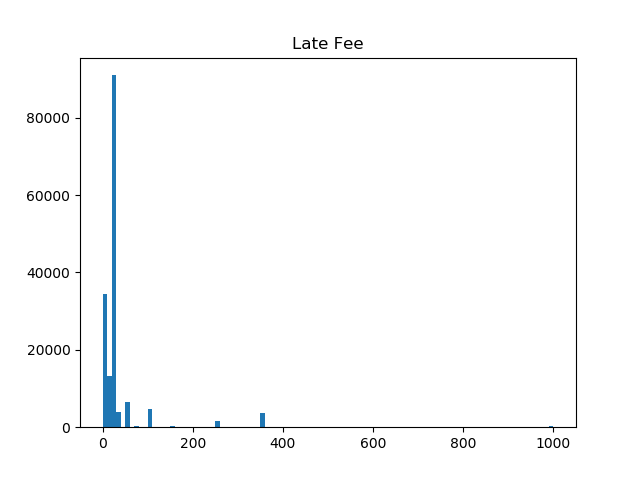

<IPython.core.display.Javascript object>


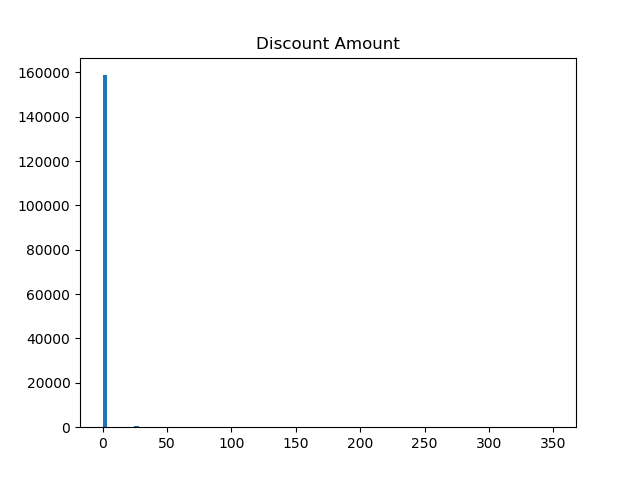

<IPython.core.display.Javascript object>


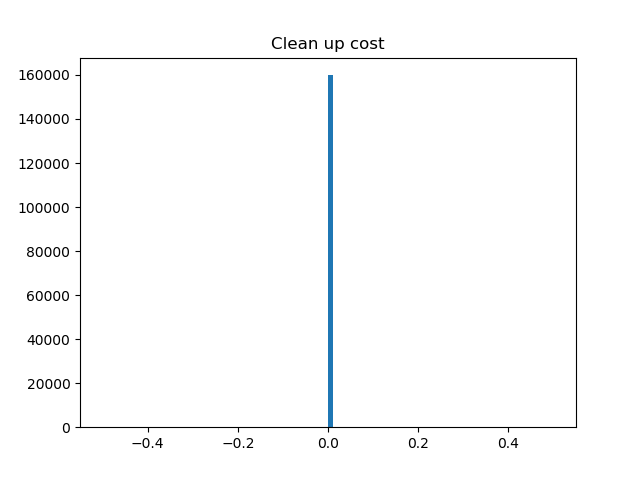

<IPython.core.display.Javascript object>


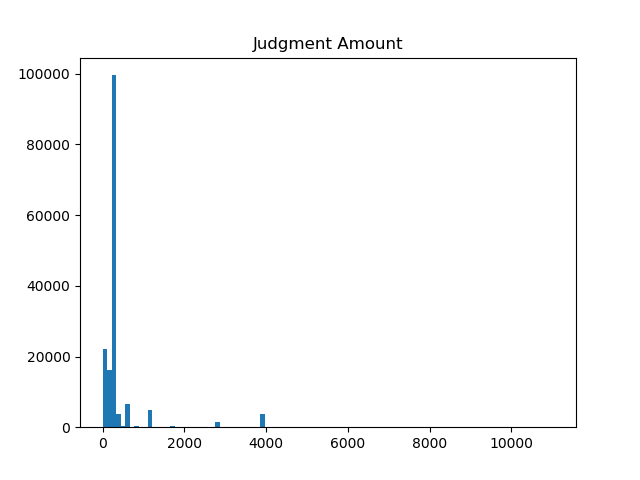

<IPython.core.display.Javascript object>


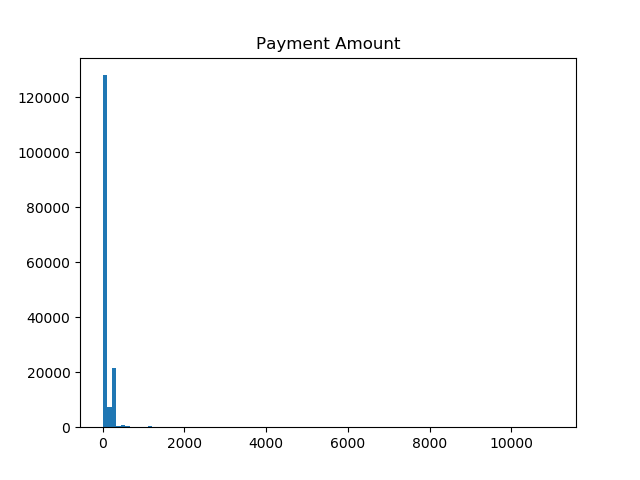

<IPython.core.display.Javascript object>


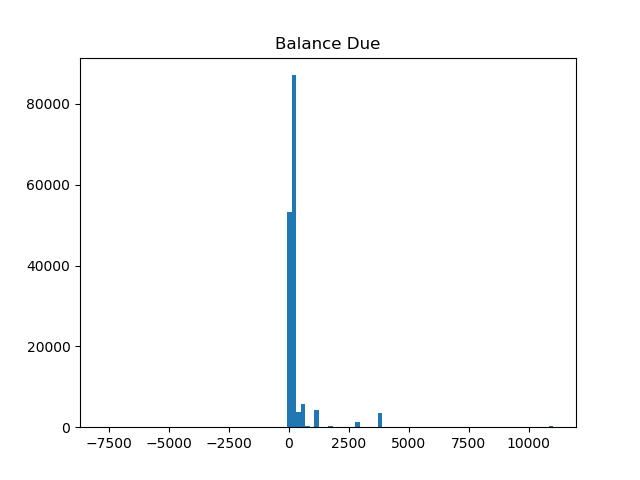

Text(0.5,1,'Balance Due')

In [12]:
# Fine amount
plt.figure()
plt.hist(train_merged.fine_amount, bins = 50)
plt.title('Fine Amount')

# Admin Fee CONSTANT
plt.figure()
plt.hist(train_merged.admin_fee,bins = 100)
plt.title('Admin Fee')

# State Fee CONSTANT
plt.figure()
plt.hist(train_merged.state_fee,bins = 100)
plt.title('State Fee')

# Late Fee
plt.figure()
plt.hist(train_merged.late_fee,bins = 100)
plt.title('Late Fee')

# Discount Amount CONSTANT
plt.figure()
plt.hist(train_merged.discount_amount,bins = 100)
plt.title('Discount Amount')

# Clean up cost CONSTANT
plt.figure()
plt.hist(train_merged.clean_up_cost,bins = 100)
plt.title('Clean up cost')

#This turns out to be zero for all the cases

# Judgment amount
plt.figure()
plt.hist(train_merged.judgment_amount,bins = 100)
plt.title('Judgment Amount')

# Payment amount
plt.figure()
plt.hist(train_merged.payment_amount,bins = 100)
plt.title('Payment Amount')

# Balance amount
plt.figure()
plt.hist(train_merged.balance_due,bins=100)
plt.title('Balance Due')

That wasn't particularly informative. Althought we did realise that the Admin Fee, State Fee, Discount Amount and Clean up cost are all constants where Discount Amount and Clean up cost being zero.  
  
### Agency names

<IPython.core.display.Javascript object>


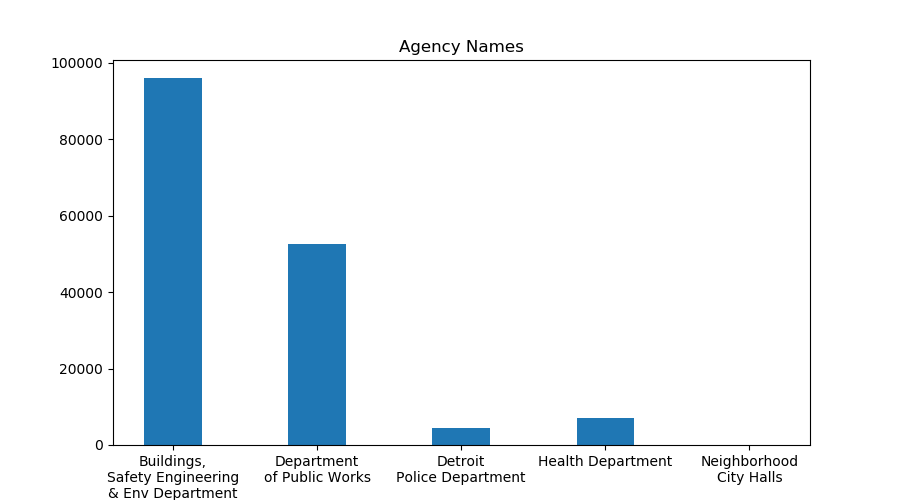

In [14]:
# Agency name
agency = train_merged.agency_name.groupby(train_merged.agency_name).size()
plt.figure(figsize = (9,5))
plt.bar(agency.index,agency, width = 0.4)
plt.title('Agency Names')
xticks_agency = ['Buildings,\nSafety Engineering\n& Env Department','Department\nof Public Works',
          'Detroit\nPolice Department','Health Department','Neighborhood\nCity Halls']
plt.gca().set_xticklabels(xticks_agency);



Alright, that's informative.   
** We have a lot more violations in Buildings,Safety Engineering and Environmental Department than every other department**

### Inspector Names
Now let's look at the Names of the inspectors who dealt the violations and see the top ten list

<IPython.core.display.Javascript object>


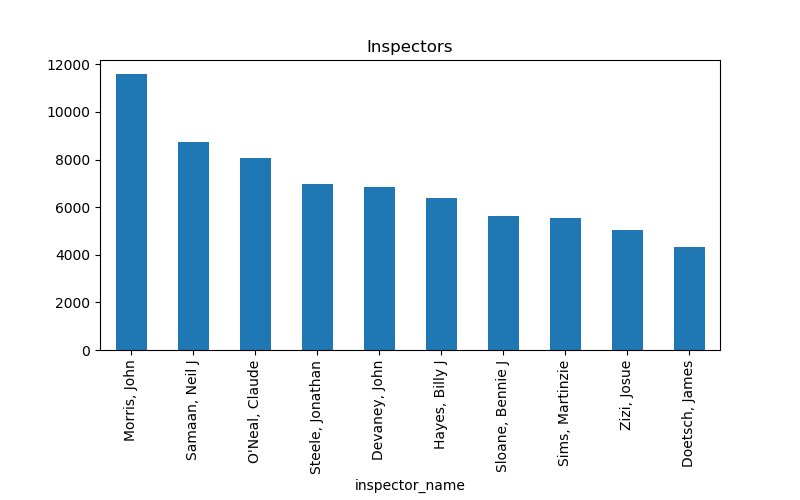

In [15]:
# inspector_name
inspector = train_merged.inspector_name.groupby(train_merged.inspector_name).size().sort_values(ascending = False)
plt.figure(figsize = (8,5))
inspector[:10].plot(kind = 'bar')
plt.title('Inspectors')
ax = plt.gca()
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.subplots_adjust(bottom = 0.3)


Most number of the violations seems to be filed by Mr. Morris John. This isn't a worth while information, unless we have the background data on these inspectors. For now, let this be just fun information on who filed the most violation cases.

### Country

The country variable contains the country given in the mailing address. If we consider the mailing address as a key to figure out whether the violator was an immigrant, there seems to be some who are. Although we cannot infer any conclusions from the dataset since the number of non-us violators are comparitively rare.

In [16]:
# country
country = train_merged.country.groupby(train_merged.country).size().sort_values(ascending = False)
print(country)

country
USA     159869
Cana         6
Egyp         2
Aust         2
Germ         1
Name: country, dtype: int64


### Violation Code

<IPython.core.display.Javascript object>


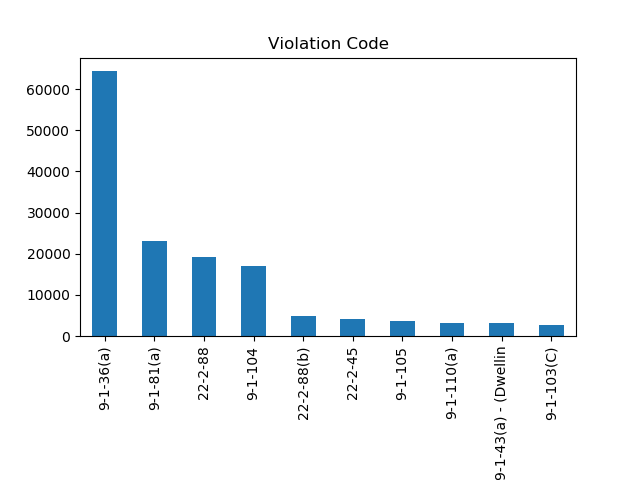

,Violation code,Description
0,9-1-36(a),['Failure of owner to obtain certificate of compliance']
1,9-1-81(a),['Failure to obtain certificate of registration for rental property']
2,22-2-88,"[ 'Failure of owner to keep property, its sidewalks, or adjoining public property free from solid waste'\n 'Failure of owner to keep property, its sidewalks, or adjoining public property free from solid, medical or hazardous waste']"
3,9-1-104,[ 'Excessive weeds or plant growth one- or two-family dwelling or commercial Building']
4,22-2-88(b),['Allowing bulk solid waste to lie or accumulate on or about the premises']
5,22-2-45,[ 'Violation of time limit for approved containers to remain at curbside - early or late']
6,9-1-105,['Rodent harborage one-or two-family dwelling or commercial building']
7,9-1-110(a),[ 'Inoperable motor vehicle(s) one- or two-family dwelling or commercial building']
8,9-1-43(a) - (Dwellin,[ 'Failure of owner of one- or two-family dwelling to comply with an emergency or imminent danger order concerining an unsafe or unsanitar'\n 'Fail to comply with an Emergency or imminent danger order concerining an unsafe or unsanitary structure or unlawful occupancy (1 or 2 f']
9,9-1-103(C),['Removal of snow and ice from sidewalks']


In [17]:
# violation_code
viol_code = train_merged.violation_code.groupby(train_merged.violation_code).size().sort_values(ascending = False)
plt.figure()
viol_code[:10].plot(kind = 'bar')
plt.subplots_adjust(bottom = 0.3)
plt.title('Violation Code')

description = []
for i in viol_code[:10].index:
    temp = train_merged[train_merged.violation_code == i]['violation_description'].unique()
    description.append([i,str(temp)])
description = pd.DataFrame(description, columns = ['Violation code','Description'])

pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)
display(description)

It look like the most number of violations are done for obtaining **certificate of compliance** and **certificate for registration of rental property**.

### Disposition

Looking at the judgment types, we can infer that the default judgment is Responsible by default.

<IPython.core.display.Javascript object>


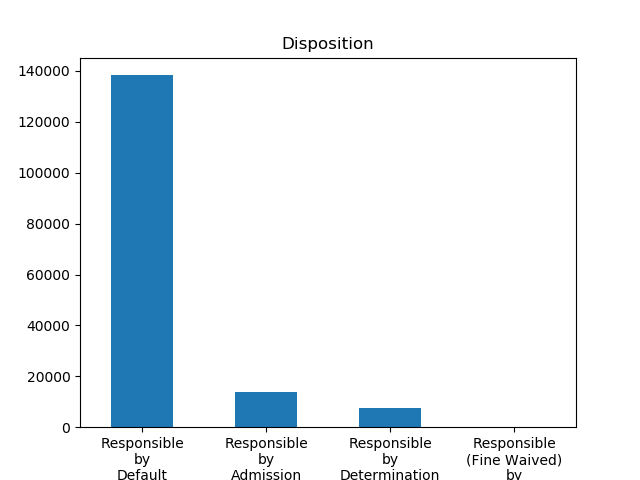

In [69]:
# disposition
dispo = train_merged.disposition.groupby(train_merged.disposition).size().sort_values(ascending = False)
plt.figure()
dispo.plot(kind = 'bar')
xticks_dispo = ['Responsible\nby\nDefault','Responsible\nby\nAdmission',
          'Responsible\nby\nDetermination','Responsible\n(Fine Waived)\nby\nDetermination']
plt.gca().set_xticklabels(xticks_dispo, rotation = 0)
plt.title('Disposition');

## Variable Interaction

Let's look at how the variables interact with each other, i.e. how does each variable correlate.

### Numerical Variables
Let's look at a correlation matrix of all the payments and see if there is any correlation between payments

<IPython.core.display.Javascript object>


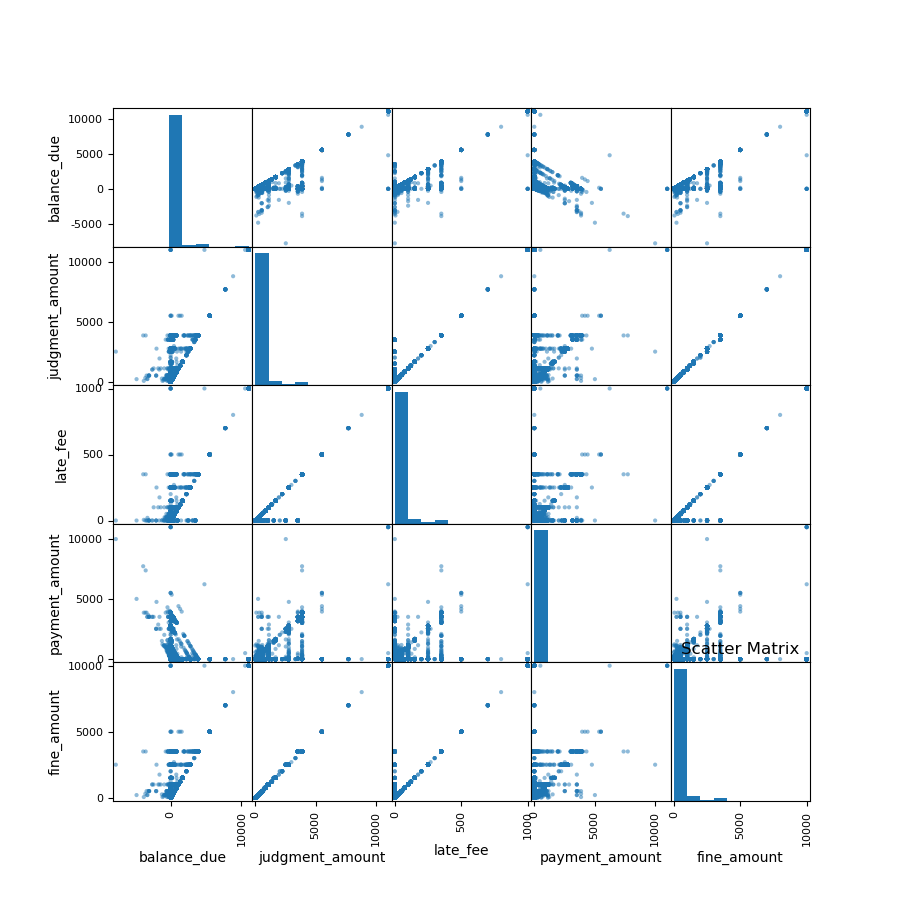

,balance_due,judgment_amount,late_fee,payment_amount,fine_amount
balance_due,1.000000,0.937491,0.944039,-0.127186,0.935709
judgment_amount,0.937491,1.000000,0.989070,0.225871,0.999890
late_fee,0.944039,0.989070,1.000000,0.177199,0.986787
payment_amount,-0.127186,0.225871,0.177199,1.000000,0.230470
fine_amount,0.935709,0.999890,0.986787,0.230470,1.000000


In [113]:
# Correlogram
numeric_variables = ['balance_due','judgment_amount','late_fee','payment_amount','fine_amount']
pd.plotting.scatter_matrix(train_merged.loc[:,numeric_variables],figsize = (9,9));
train_merged.loc[:,numeric_variables].corr()

The figure shows that some of the payment amounts are correlated to each other. For eg, Judgment amount and fine amount seems to be positively correlated and almost equal. This can also be seens from the correlation table.

### Compliance vs Payments

Now let's look at how these payments correlate with compliance 

<IPython.core.display.Javascript object>


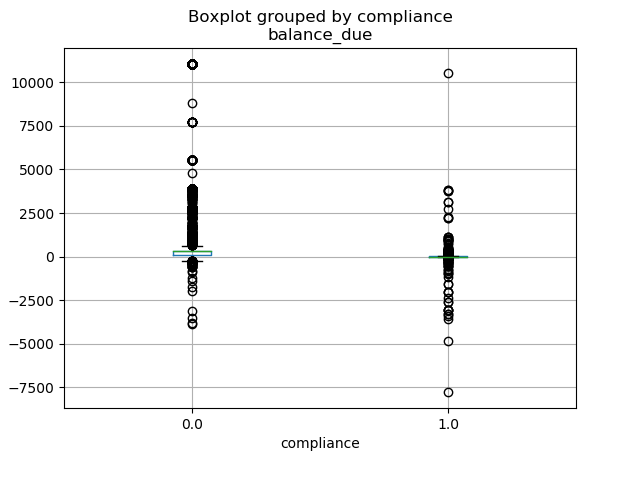

H:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


<IPython.core.display.Javascript object>


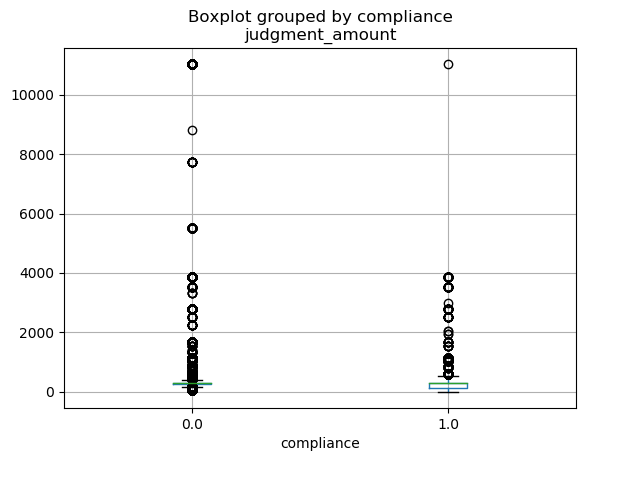

<IPython.core.display.Javascript object>


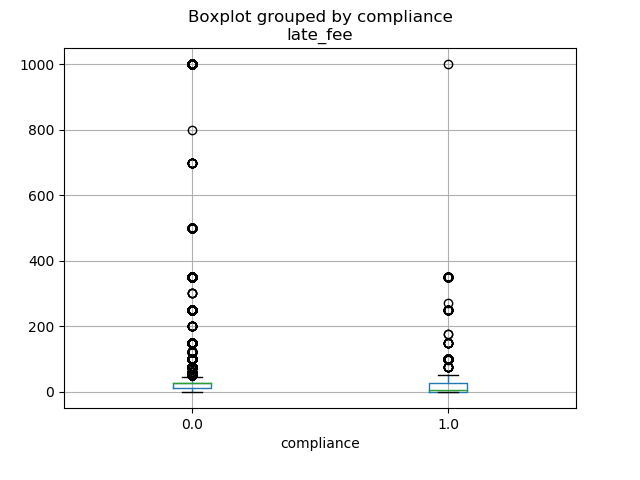

<IPython.core.display.Javascript object>


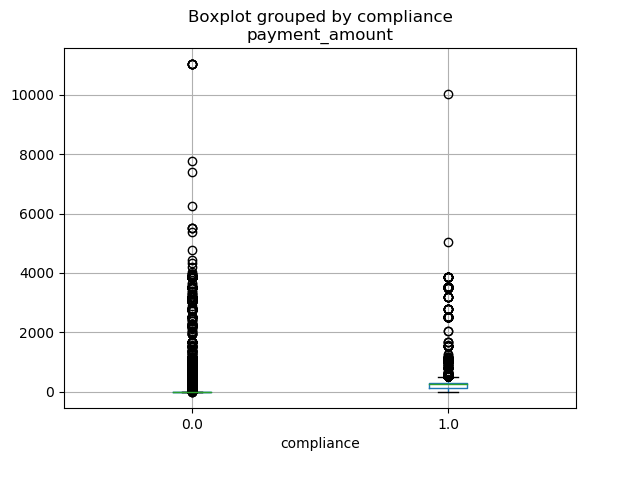

<IPython.core.display.Javascript object>


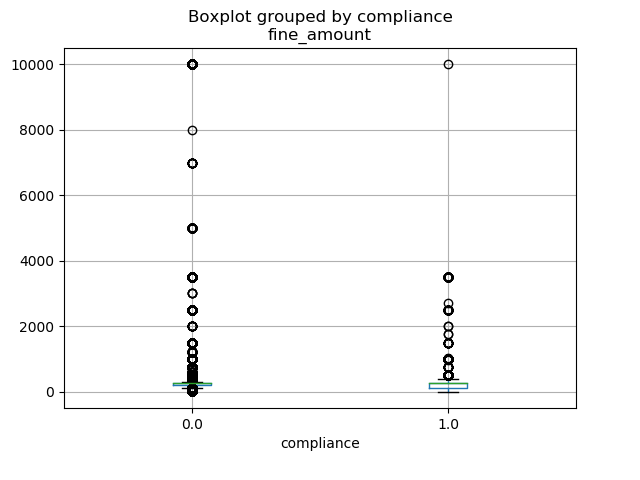

In [116]:
#numeric_variables = ['balance_due','judgment_amount','late_fee','payment_amount','fine_amount']
# Boxplots
# Compliance Vs Payment Amounts

for item in numeric_variables:
    train_merged.boxplot(item,by = 'compliance')
    #plt.yscale('log')

These plots are not particulary informative because of the scaling used. But for now, let's leave it at that.

### Compliance vs Street
Let's look at the number and percentage of compliance per street. Here we are looking at the top 10 streets with most number of non-compliance, compliance and percentage compliance respectively.

<IPython.core.display.Javascript object>


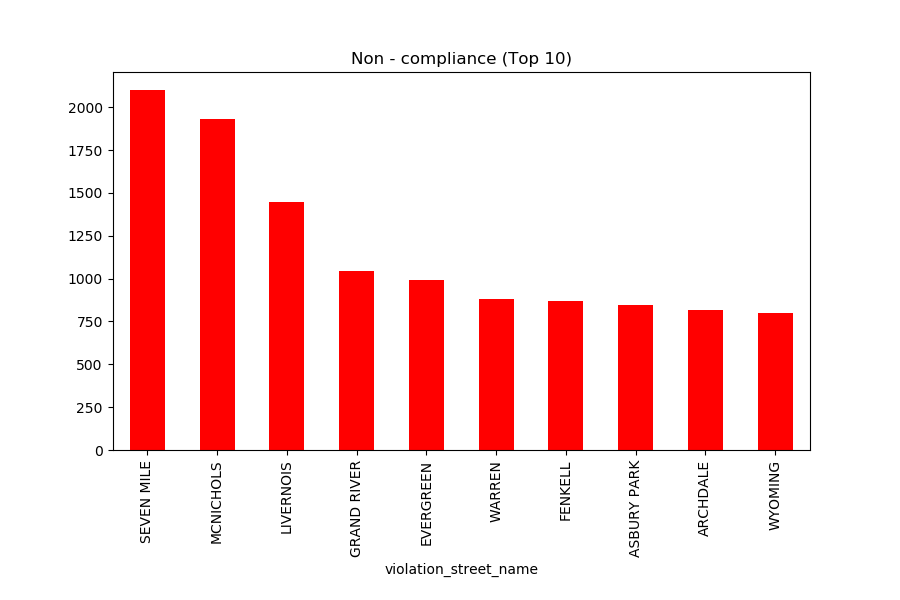

<IPython.core.display.Javascript object>


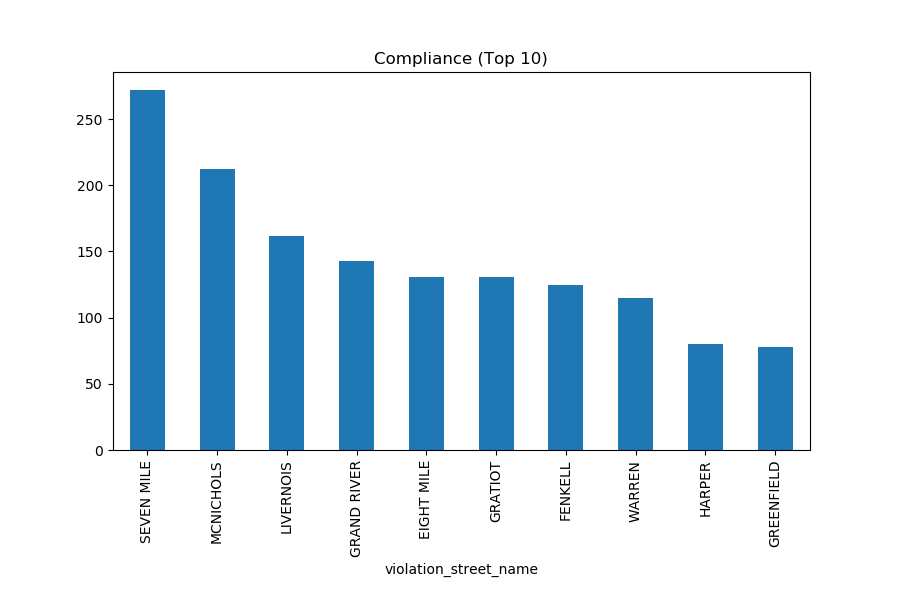

<IPython.core.display.Javascript object>


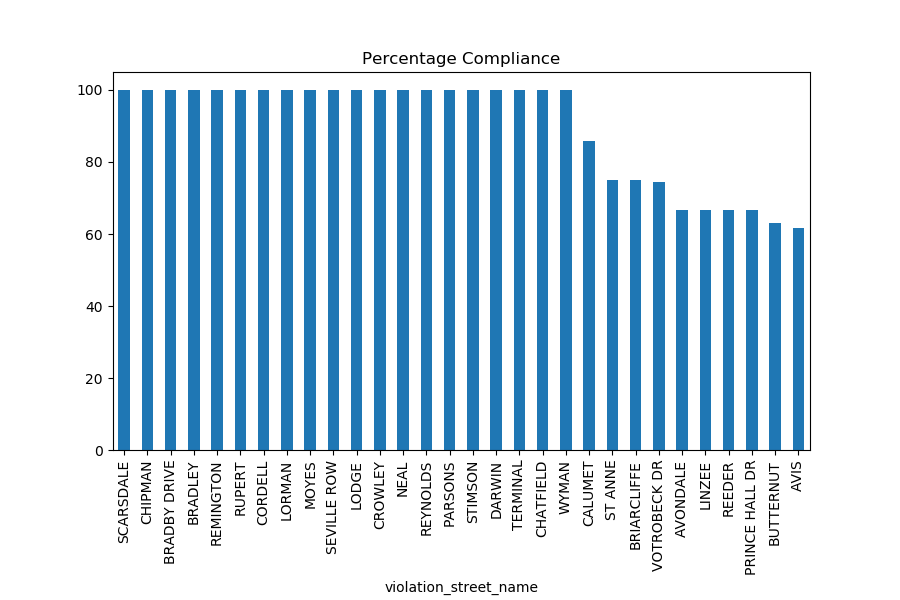

In [134]:
# Let's look at the number of non-compliance per street
per_street = pd.crosstab(train_merged.violation_street_name,train_merged.compliance)
per_street_non_compliance = per_street[0].sort_values(ascending = False)

plt.figure(figsize = (9,6))
per_street_non_compliance[:10].plot(kind = 'bar', color = 'red')
plt.title('Non - compliance (Top 10)')
plt.subplots_adjust(bottom = 0.25)

per_street_compliance = per_street[1].sort_values(ascending = False)
plt.figure(figsize = (9,6))
per_street_compliance[:10].plot(kind = 'bar')
plt.title('Compliance (Top 10)')
plt.subplots_adjust(bottom = 0.25)

# Percentage of compliance per street
per_street_compliance_percent = (per_street[1]/per_street.sum(axis =1))*100
per_street_compliance_percent = per_street_compliance_percent.sort_values(ascending = False)
plt.figure(figsize = (9,6))
per_street_compliance_percent[:30].plot(kind = 'bar')
plt.title('Percentage Compliance')
plt.subplots_adjust(bottom = 0.25)

The most number of compliance and non-compliance are from the same street, **Seven Miles**. But it doesn't have a considerable compliance percentage. There are a lot of streets with 100% compliance. Although, some of them are 100% compliant just because the number of violations are very low.

#### Note to Data Imbalance:
From the table below, it is clear that we hace a lot more observations of non-compliance than compliance. As a result, from this points onwards, it is better to look at just compliance and ignore non-compliance, just to get an understanding of the data set and where and what correlates with compliance.

In [8]:
train_merged.compliance.groupby(train_merged.compliance).size()

compliance
0.0    148283
1.0     11597
Name: compliance, dtype: int64

### Compliance vs Agency

<IPython.core.display.Javascript object>


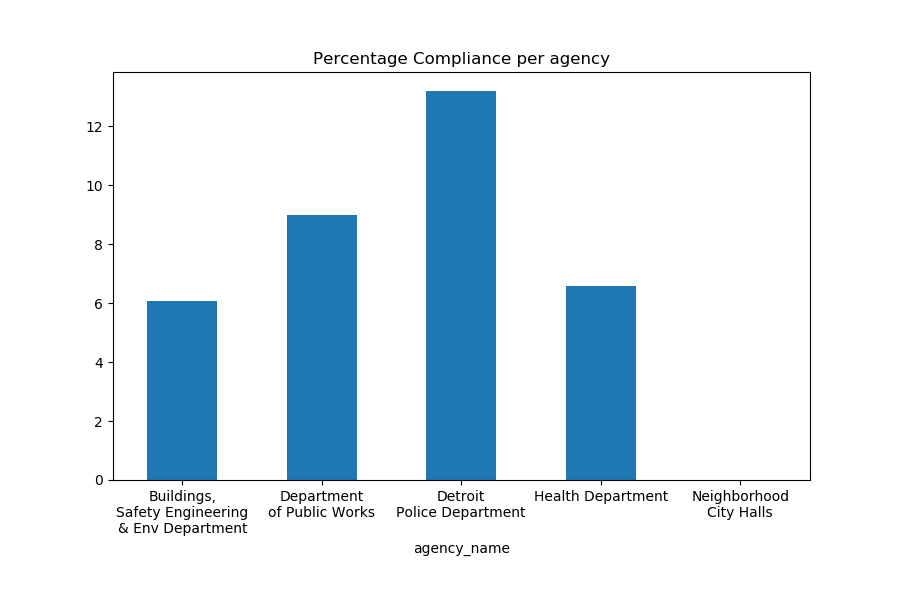

In [44]:
# agency_name
per_agency = pd.crosstab(train_merged.agency_name,train_merged.compliance)
per_agency_compliance = (per_agency[1]/per_agency.sum(axis =1))*100
plt.figure()
per_agency_compliance.plot(kind = 'bar', figsize = (9,6))
plt.gca().set_xticklabels(xticks_agency, rotation = 0)
plt.title('Percentage Compliance per agency')
plt.subplots_adjust(bottom = 0.2)

Although most violation cases turns out to be non-compliant, more than 12% of **Detroit Police Department** cases are compliant. We initially saw that most of the violation cases are form Buildings,Safety Engineering and Env department, but only a mere 6% of it is compliant.

### Compliance vs Inspector

<IPython.core.display.Javascript object>


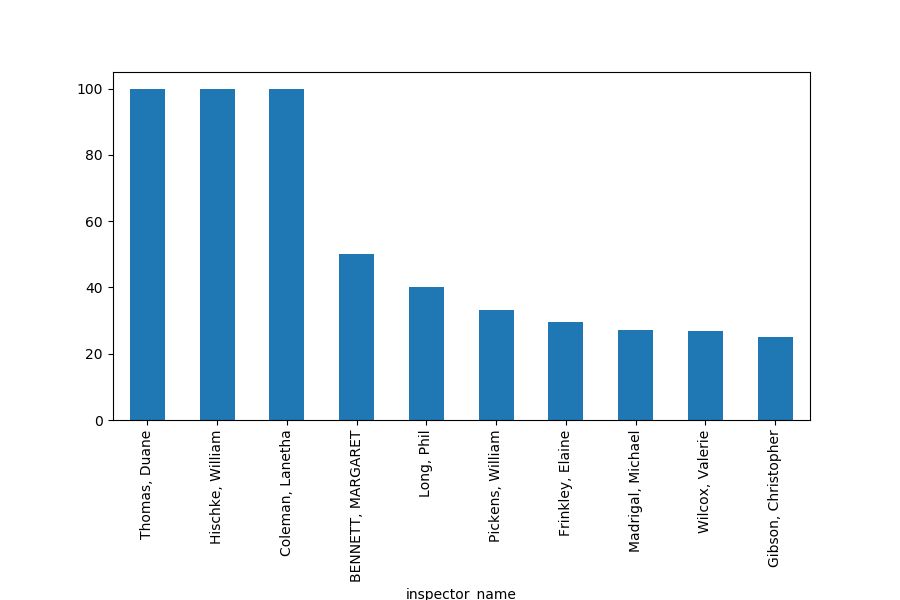

In [58]:
# inspector_name
per_inspector_name = pd.crosstab(train_merged.inspector_name, train_merged.compliance)
per_inspector_compliance = (per_inspector_name[1]/per_inspector_name.sum(axis =1))*100
per_inspector_compliance = per_inspector_compliance.sort_values(ascending = False)
plt.figure()
per_inspector_compliance[:10].plot(kind = 'bar', figsize = (9,6))
plt.subplots_adjust(bottom = 0.3)

### Compliance vs Violation type

<IPython.core.display.Javascript object>


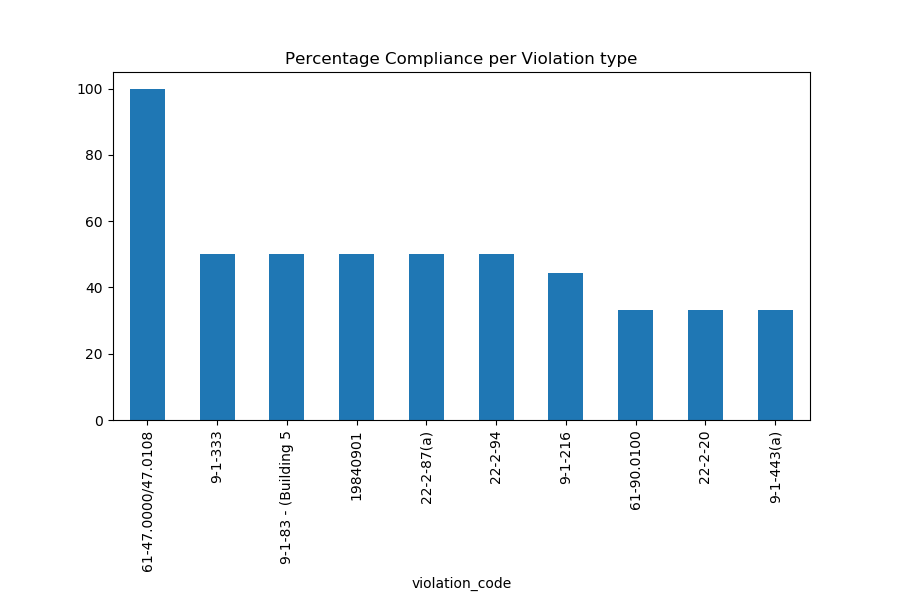

,Violation code,Description
0,61-47.0000/47.0108,['Insufficient parking']
1,9-1-333,"[ 'Unlawful disposal, separation, or storage of commercial solid waste by commercial establisments building']"
2,9-1-83 - (Building 5,[ 'Failure to obtain a lead clearance for rental property - buildings with five (5) or more stories']
3,19840901,"[ ""Failure to post Tenant's Statement of Rights or House Rules and Tenant Responsibilities one- or two-family dwelling or commercial build""]"
4,22-2-87(a),"[ 'Failure to remove, or cause to be removed, and properly dispose of medical or hazardous waste before vacating private property or water']"
5,22-2-94,"[ 'Failure to transport and deliver scrap tires to proper disposal area or licensed transfer facility, or to use vehicle or container that does not leak or spill']"
6,9-1-216,['Defective door(s) one- or two-family dwelling or commercial building']
7,61-90.0100,"['Other Non-Compliance with Land Use Requirements (B1,B2,B3,B4,B5,B6)']"
8,22-2-20,['Burning solid waste in open fires']
9,9-1-443(a),[ 'Defective or unapproved plumbing connection to public sewer system one- or two- family dwelling or building']


In [59]:
# violation_code
per_violation_code = pd.crosstab(train_merged.violation_code, train_merged.compliance)
per_violation_compliance = (per_violation_code[1]/per_violation_code.sum(axis =1))*100
per_violation_compliance = per_violation_compliance.sort_values(ascending = False)
plt.figure()
per_violation_compliance[:10].plot(kind = 'bar',figsize = (9,6))
plt.title('Percentage Compliance per Violation type')
plt.subplots_adjust(bottom = 0.3)

compliance_description = []
for i in per_violation_compliance[:10].index:
    temp = train_merged[train_merged.violation_code == i]['violation_description'].unique()
    compliance_description.append([i,str(temp)])

compliance_description = pd.DataFrame(compliance_description, columns = ['Violation code','Description'])

pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)
display(compliance_description)

It looks like most people okay with paying for insufficient parking violations, almost 100% of parking ticket violations are compliant. Although the number of these violations may play a big hand in predictive modeling. But every other violations such as unlawful disposal of commercial solid waste, clearance for rental property etc. are only 40% compliant.

### Compliance vs Disposition

<IPython.core.display.Javascript object>


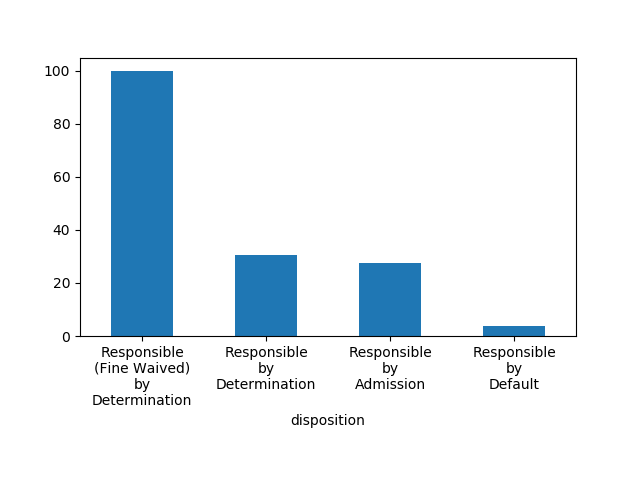

In [68]:
# disposition
per_dispo = pd.crosstab(train_merged.disposition, train_merged.compliance)
per_dispo_compliance = ((per_dispo[1]/per_dispo.sum(axis = 1))*100).sort_values(ascending = False)
plt.figure()
per_dispo_compliance.plot(kind = 'bar')
plt.gca().set_xticklabels(xticks_dispo[::-1], rotation = 0)
plt.subplots_adjust(bottom = 0.3)

 There is one aspect of the data that we have not looked at so far. Date of ticket issue and date of hearing. Let's have a look:
 
 ### Date of ticket issual

<IPython.core.display.Javascript object>


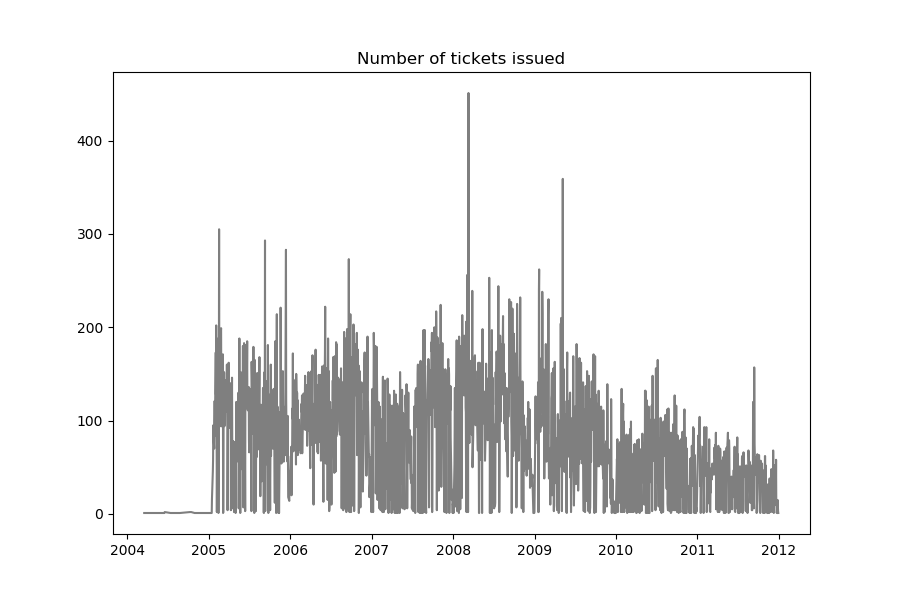

In [63]:
# Converting the column to datetime object
train_merged.ticket_issued_date = pd.to_datetime(train_merged.ticket_issued_date)

#Stripping off only the date
train_merged['issued_date'] = train_merged.ticket_issued_date.apply(lambda x: x.strftime('%Y-%m-%d'))

# There seems to be an outlier or mistake
train_merged = train_merged[~(train_merged.issued_date == '1988-05-06')]

# Grouping by day
tickets_perday = train_merged.groupby(by = train_merged.issued_date, as_index = False).size().reset_index()
tickets_perday.issued_date = pd.to_datetime(tickets_perday.issued_date)

plt.figure(figsize = (9,6))
plt.plot(tickets_perday.issued_date,tickets_perday.loc[:,0],'-',color = 'black',alpha = 0.5)
plt.title('Number of tickets issued');

As you can see, there's a peak at the first quarter of 2008 which coincides with the 2008 recession. Let's have a look at the number of compliant and non-compliant cases for the same time period

### Compliance per day

<IPython.core.display.Javascript object>


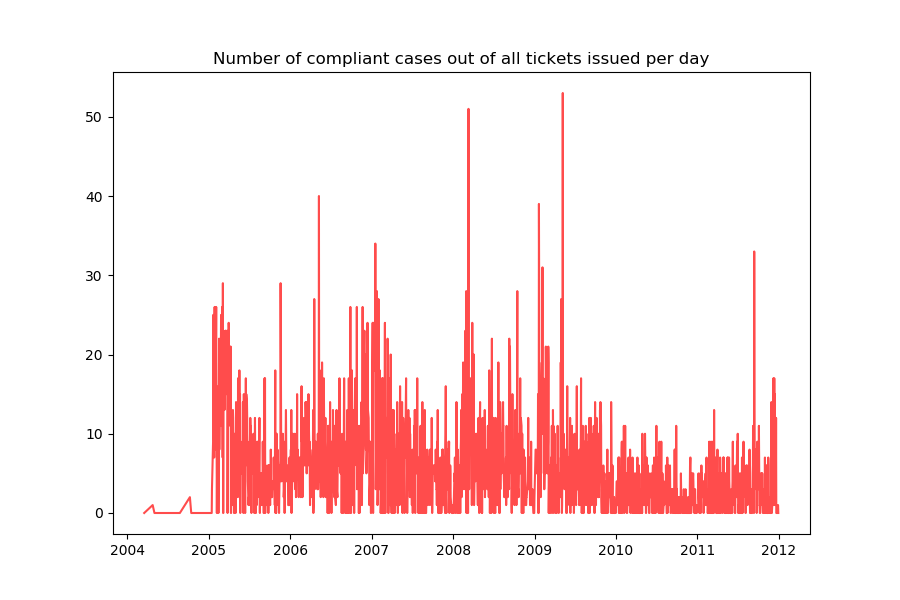

Text(0.5,1,'Number of compliant cases out of all tickets issued per day')

In [72]:
# Grouping by date
compliance_perday = train_merged.groupby(by = train_merged.issued_date, as_index = False).sum()
compliance_perday = compliance_perday.loc[:,['compliance','issued_date']]
compliance_perday.issued_date = pd.to_datetime(compliance_perday.issued_date)

plt.figure(figsize= (9,6))
plt.plot(compliance_perday.issued_date, compliance_perday.compliance,'-',color='red',alpha = 0.7)
plt.title('Number of compliant cases out of all tickets issued per day');

As you can see, out of the 400+ tickets issued during 2008 (where we had a peak in number of tickets issued), only 50 of them were compliant. Next up, let's check if the time taken between issual and hearing has any effect on the compliance.

### Compliance vs Time gap in hearing

<IPython.core.display.Javascript object>


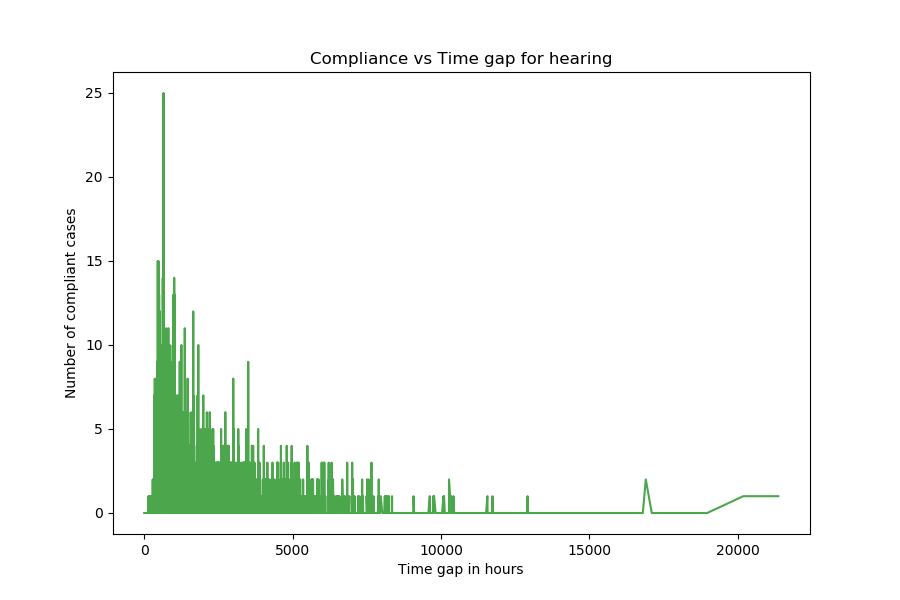

Text(0,0.5,'Number of compliant cases')

In [122]:
# Converting hearing date column to datetime object
train_merged.hearing_date = pd.to_datetime(train_merged.hearing_date)

# Calculating the time between ticket issual and hearing date in hours
from datetime import timedelta
train_merged['time_gap'] = (train_merged.hearing_date - train_merged.ticket_issued_date)/timedelta(minutes = 60)

# There seems to be some documentation mistakes which comes up as negatives and zeros in time_gap. There are such 81 rows
train_merged = train_merged.loc[~(train_merged.time_gap <= 0),:]

# Finding the number of compliance for each time gap
compliance_pergap = train_merged.groupby(by = 'time_gap').sum()
compliance_pergap = compliance_pergap['compliance']
#compliance_pergap.index[:27375]

plt.figure(figsize = (9,6))
plt.plot(compliance_pergap.index[:27374],compliance_pergap[:27375], '-',color = 'green',alpha = 0.7)
plt.title('Compliance vs Time gap for hearing');
plt.xlabel('Time gap in hours')
plt.ylabel('Number of compliant cases')

It is evident that as the time gap increases the chances of compliance goes down. But it seems there is also requirement of a minimum time gap for people to be compliant because the people doesn't occur at the immediate begning of the plot.

## Inferences:
- **Since the number of compliant observations are very low in the data set, it looks as if almost all the violations turned out to be non-compliant. So it becomes important to consider metrics other than accuracy while doing predictive modelling**
- The Admin Fee, State Fee, Discount Amount and Clean up cost are all constants and Discount Amount and Clean up cost are zero.
- There are lot more violations in Buildings,Safety Engineering and Environmental Department than every other department
- Most number of violations are done for obtaining certificate of compliance and certificate for registration of rental property.
- Some of the payment amounts are correlated to each other. For eg, Judgment amount and fine amount seems to be positively correlated and are almost equal
- The most number of compliance and non-compliance are from the same street, Seven Miles. But it doesn't have a considerable compliance percentage. There are a lot of streets with 100% compliance
- More than 12% of Detroit Police Department cases are compliant. We initially saw that most of the violation cases are form Buildings,Safety Engineering and Env department, but only a mere 6% of it is compliant.
- It looks like most people okay with paying for insufficient parking violations, almost 100% of parking ticket violations are compliant (This could also be because of the small number of violations in that particular type). 
- Every other violations such as unlawful disposal of commercial solid waste, clearance for rental property etc. are only 40% compliant.
- It is to be noted that the percentage of compliance for responsible by default is the least among all four judgments.
- 2008 recession's effect on number of tickets issued and number of non-compliance is evident from the data
